In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from pennylane import numpy as np
import pennylane as qml
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import f1_score as f1
from sklearn.metrics import recall_score as recall
from sklearn.decomposition import PCA 
from qiskit import *
import seaborn as sns
import plotly.express as px
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


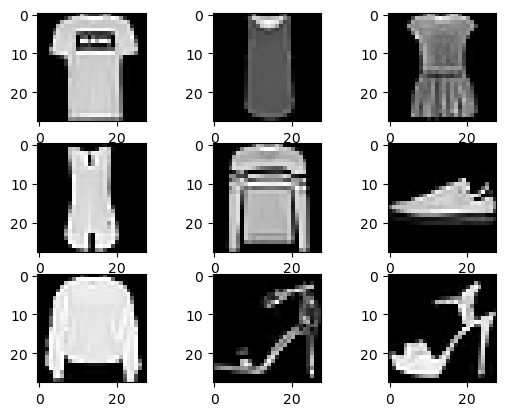

In [37]:
for i in range(1, 10):

    plt.subplot(3, 3, i)

    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 

plt.show()

In [4]:
print(x_train.shape)


(60000, 28, 28)


In [22]:

number_of_data_points = 10000
y = pd.DataFrame(y_train[0:number_of_data_points])


In [23]:

x_data = pd.DataFrame()
for i in range(number_of_data_points):
    x=x_train[i]
    
    new_x = pd.DataFrame()
    for j in range(len(x[0])):
        new_val = pd.Series()
        new_val= pd.concat([new_val,pd.Series(x[j])])


        new_x= pd.concat([new_x,(new_val.to_frame().T)],axis=1,ignore_index= True)
    x_data = pd.concat([x_data,new_x],ignore_index=False,axis = 0)

copyOfx = x_data


In [24]:


scaler = MaxAbsScaler() 

x_data = scaler.fit_transform(x_data)

normalizer = Normalizer().fit(x_data)


normalizer.transform(x_data)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
pca = PCA(n_components = 3 ) 
 
 
 
xs_data = pca.fit_transform(x_data) 
 

In [26]:

y_new = y.replace([9,8,7,6,5,4,3,2],0)


In [27]:
y = y_new

In [28]:
print(y)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
9995  0
9996  0
9997  0
9998  0
9999  0

[10000 rows x 1 columns]


In [29]:

x_train, x_test, y_train, y_test = train_test_split(xs_data, y, train_size = 0.8)

x_traindf = pd.DataFrame(x_train)
x_testdf = pd.DataFrame(x_test)
y_traindf = pd.DataFrame(y_train)
y_testdf = pd.DataFrame(y_test)

x_test =np.array(x_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)



ylist = []
y_train = y_train.transpose()
for i in range(len(y_train)):
    
    ylist.append(y_train[i])


y_train = np.array(ylist,requires_grad=False)
y_train=y_train[0]

ylist = []
y_test = y_test.transpose()
for i in range(len(y_test)):
    
    ylist.append(y_test[i])


y_test = np.array(ylist,requires_grad=False)
y_test=y_test[0]
xlist = []

for i in range(len(x_train)):
    
    xlist.append(x_train[i])


x_train = np.array(xlist,requires_grad=False)

X_train = x_train
X_test =x_test


In [30]:
print(y_test)

[0 0 0 ... 0 0 0]


In [31]:

X_train = x_train
X_test =x_test
print(len(y_test))
print(len(X_test))
print(x_test)


2000
2000
[[ 1.21983283  0.80901894  2.92333386]
 [-5.49526751  0.290661    1.95724505]
 [ 5.9620656   4.80745934  0.12617995]
 ...
 [-0.45952357 -3.88342893  3.0843727 ]
 [ 6.68944242 -0.44761741  0.49740029]
 [-1.98170684 -0.07199672  3.33955715]]


In [17]:
dev = qml.device("lightning.qubit", wires=1)
@qml.qnode(dev)
def qcircuit(params, x, y):

    for p in params:
        qml.Rot(*x, wires=0)
        qml.Rot(*p, wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))



In [14]:

class Reuploader():
    
    num_layers =0
    learning_rate=0
    epochs=0 
    batch_size=0
    model = np.array
    opt = 0
    dev=0
    params=0
    state_labels =0
    label_0 = [[1], [0]]
    label_1 = [[0], [1]]
    
   

    def __init__(self,dev,num_layers = 4, learning_rate = 0.6, epochs= 10, batch_size = 32, ):

        self.num_layers = num_layers
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)
        self.dev = dev 
        self.params = np.random.uniform(size=(num_layers, 3), requires_grad=True)
        self.state_labels = np.array([self.label_0, self.label_1], requires_grad=False)
        

    
    def density_matrix(self,state):
        """Calculates the density matrix representation of a state.

        Args:
            state (array[complex]): array representing a quantum state vector

        Returns:
            dm: (array[complex]): array representing the density matrix
        """
        return state * np.conj(state).T






    def cost(self, params, x, y, state_labels=None):
        """Cost function to be minimized.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): array of state representations for labels

        Returns:
            float: loss value to be minimized
        """
        # Compute prediction for each input in data batch
        loss = 0.0
        dm_labels = [self.density_matrix(s) for s in state_labels]
        for i in range(len(x)):
            f = qcircuit(params, x[i], dm_labels[y[i]])
            loss = loss + (1 - f) ** 2
        return loss / len(x)

    def test(self,params, x, y, state_labels=None):
        """
        Tests on a given set of data.

        Args:
            params (array[float]): array of parameters
            x (array[float]): 2-d array of input vectors
            y (array[float]): 1-d array of targets
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            predicted (array([int]): predicted labels for test data
            output_states (array[float]): output quantum states from the circuit
        """
        fidelity_values = []
        dm_labels = [self.density_matrix(s) for s in state_labels]
        predicted = []

        for i in range(len(x)):
            fidel_function = lambda y: qcircuit(params, x[i], y)
            fidelities = [fidel_function(dm) for dm in dm_labels]
            best_fidel = np.argmax(fidelities)

            predicted.append(best_fidel)
            fidelity_values.append(fidelities)

        return np.array(predicted), np.array(fidelity_values)


    def accuracy_score(self,y_true, y_pred):
        """Accuracy score.

        Args:
            y_true (array[float]): 1-d array of targets
            y_predicted (array[float]): 1-d array of predictions
            state_labels (array[float]): 1-d array of state representations for labels

        Returns:
            score (float): the fraction of correctly classified samples
        """
    
        score = y_true == y_pred
        return score.sum() / len(y_true)


    def iterate_minibatches(self, inputs, targets, batch_size):
        """
        A generator for batches of the input data

        Args:
            inputs (array[float]): input data
            targets (array[float]): targets

        Returns:
            inputs (array[float]): one batch of input data of length `batch_size`
            targets (array[float]): one batch of targets of length `batch_size`
        """
        for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
            idxs = slice(start_idx, start_idx + batch_size)
            yield inputs[idxs], targets[idxs]


    def fit(self,X_train, y_train):

        for it in range(self.epochs):
            for Xbatch, ybatch in self.iterate_minibatches(X_train, y_train, batch_size=self.batch_size):
                self.params, _, _, _ = self.opt.step(self.cost, self.params, Xbatch, ybatch, self.state_labels)

            predicted_train, fidel_train = self.test(self.params, X_train, y_train, self.state_labels)
            accuracy_train = self.accuracy_score(y_train, predicted_train)
            loss = self.cost(self.params, X_train, y_train, self.state_labels)
            

            res = [it + 1, loss, accuracy_train]
            print(
                "Epoch: {:2d} | Loss: {:3f} |  accuracy: {:3f} ".format(
                    *res
                )
            )
    def predict(self,X_test, y_test):

        predicted_test, fidel_test = self.test(self.params, X_test, y_test, self.state_labels)

        return predicted_test



    

    


In [15]:
print(y_train)

[0 0 0 ... 0 0 0]


In [14]:


model = Reuploader( dev, num_layers=2)

model.fit(X_train, y_train)


Epoch:  1 | Loss: 0.191583 |  accuracy: 0.730000 
Epoch:  2 | Loss: 0.185807 |  accuracy: 0.742500 
Epoch:  3 | Loss: 0.205918 |  accuracy: 0.725000 
Epoch:  4 | Loss: 0.182044 |  accuracy: 0.743750 
Epoch:  5 | Loss: 0.191380 |  accuracy: 0.726875 
Epoch:  6 | Loss: 0.200376 |  accuracy: 0.716875 
Epoch:  7 | Loss: 0.194853 |  accuracy: 0.714375 
Epoch:  8 | Loss: 0.193496 |  accuracy: 0.715625 
Epoch:  9 | Loss: 0.208062 |  accuracy: 0.706875 
Epoch: 10 | Loss: 0.186327 |  accuracy: 0.733750 


In [65]:
y_pred = model.predict(x_test,y_test)

In [69]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [68]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 0.3333333333333333 
F1 score function of presscion and recall:0.4444444444444444 


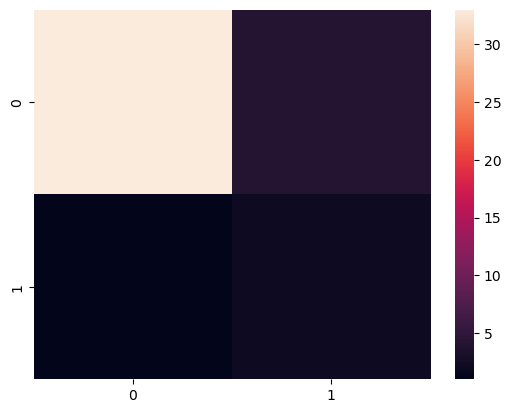

In [70]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [ ]:
model = Reuploader( dev, num_layers=3)

model.fit(X_train, y_train)

In [ ]:
model = Reuploader( dev, num_layers=4)

model.fit(X_train, y_train)

In [71]:
model = Reuploader( dev, num_layers=5)

model.fit(X_train, y_train)

Epoch:  1 | Loss: 0.242271 |  accuracy: 0.650000 
Epoch:  2 | Loss: 0.284554 |  accuracy: 0.556250 
Epoch:  3 | Loss: 0.259819 |  accuracy: 0.587500 
Epoch:  4 | Loss: 0.222138 |  accuracy: 0.650000 
Epoch:  5 | Loss: 0.188153 |  accuracy: 0.743750 
Epoch:  6 | Loss: 0.179805 |  accuracy: 0.743750 
Epoch:  7 | Loss: 0.152074 |  accuracy: 0.750000 
Epoch:  8 | Loss: 0.138150 |  accuracy: 0.806250 
Epoch:  9 | Loss: 0.139095 |  accuracy: 0.800000 
Epoch: 10 | Loss: 0.148910 |  accuracy: 0.800000 


In [72]:
y_pred = model.predict(x_test,y_test)

Recall(TP/FN+TP ):0.3333333333333333
Precsion(TP/FP+TP): 0.1111111111111111 
F1 score function of presscion and recall:0.16666666666666666 


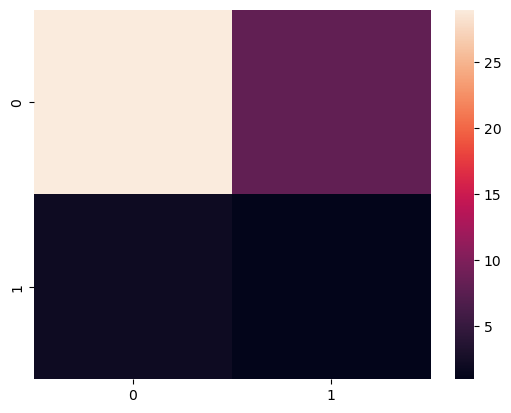

In [73]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [74]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

In [18]:
class QRF:

 
    x_bags = []
    y_bags =[]
    QDT = []
    no_QDT=0
    depth =0
    sensetivity = 0


    def __init__(self, x_train, y_train,  no_QDT, depth =2, sensetivity=0.2 ):

        self.X_train= x_train
        self.y_train= y_train
        self.no_QDT = no_QDT
        self.depth = depth
        self.x_bags = [[] for j in range(no_QDT)]
        self.y_bags = [[] for j in range(no_QDT)]
        self.QDT = []
        self.sensetivity = sensetivity


      


    def Create_Models(self):

        for i in range(self.no_QDT):
            self.QDT.append(Reuploader(dev,self.depth))

    
    def data_bagging(self):

        k=0
        
        for j in range(self.no_QDT):
            x_bags =  []
            y_bags = []
            for i in range(int(len(self.X_train)/self.no_QDT)):
                
                
                x_bags.append(self.X_train[k])
                y_bags.append(self.y_train[k])
                k+=1
            self.x_bags[j] = (x_bags)
            self.y_bags[j] = (y_bags)
            
    
    def train(self):
    
        self.data_bagging()
        self.Create_Models()
        print(self.no_QDT)
        for i in range(len(self.QDT)):
            print(f" Training QDT no : {i+1}")
            self.QDT[i].fit(np.array(self.x_bags[i]),np.array(self.y_bags[i]))
            
    
    def predict(self,x_test,y_test):
        
        individual_results = []
        result = [3 for x in range(len(x_test))]
        sum_of_results = [0 for y in range(len(x_test)) ]
        for i  in range(len(self.QDT)):

            individual_results.append(self.QDT[i].predict(x_test,y_test))
            
           

            sum_of_results = sum_of_results + individual_results[i]
       
        for q in range(len(sum_of_results)):
            

            if sum_of_results[q]/self.no_QDT >= self.sensetivity:
                
                result[q] = 1
            else:
                result[q] = 0
        print(sum_of_results)
                

        
        
        
        return result,individual_results



        




        

    
        

In [76]:
qrf = QRF(X_train,y_train, no_QDT=2, sensetivity=0.5)

qrf.train()


2
 Training QDT no : 1
Epoch:  1 | Loss: 0.200912 |  accuracy: 0.737500 
Epoch:  2 | Loss: 0.215102 |  accuracy: 0.712500 
Epoch:  3 | Loss: 0.207184 |  accuracy: 0.700000 
Epoch:  4 | Loss: 0.221980 |  accuracy: 0.675000 
Epoch:  5 | Loss: 0.210048 |  accuracy: 0.675000 
Epoch:  6 | Loss: 0.193070 |  accuracy: 0.737500 
Epoch:  7 | Loss: 0.187984 |  accuracy: 0.725000 
Epoch:  8 | Loss: 0.194775 |  accuracy: 0.675000 
Epoch:  9 | Loss: 0.200804 |  accuracy: 0.700000 
Epoch: 10 | Loss: 0.196691 |  accuracy: 0.712500 
 Training QDT no : 2
Epoch:  1 | Loss: 0.255558 |  accuracy: 0.650000 
Epoch:  2 | Loss: 0.188216 |  accuracy: 0.725000 
Epoch:  3 | Loss: 0.231986 |  accuracy: 0.650000 
Epoch:  4 | Loss: 0.243182 |  accuracy: 0.600000 
Epoch:  5 | Loss: 0.217377 |  accuracy: 0.700000 
Epoch:  6 | Loss: 0.214473 |  accuracy: 0.737500 
Epoch:  7 | Loss: 0.209780 |  accuracy: 0.712500 
Epoch:  8 | Loss: 0.200929 |  accuracy: 0.675000 
Epoch:  9 | Loss: 0.193775 |  accuracy: 0.737500 
Epoch:

In [77]:

y_pred,y_ind = qrf.predict(X_test, y_test)


[0 0 0 2 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 2 1 0 2 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 0]


Recall(TP/FN+TP ):0.6666666666666666
Precsion(TP/FP+TP): 0.14285714285714285 
F1 score function of presscion and recall:0.23529411764705882 


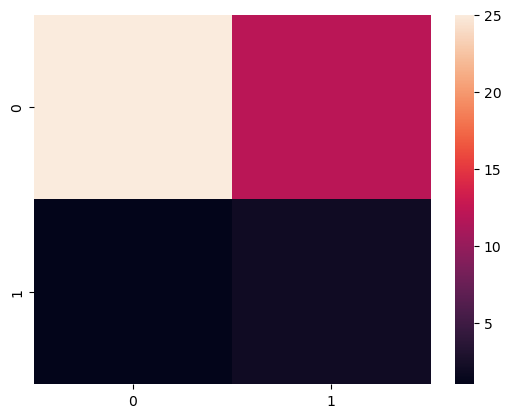

In [78]:
conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [79]:

px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [80]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

3
 Training QDT no : 1
Epoch:  1 | Loss: 0.189903 |  accuracy: 0.754717 
Epoch:  2 | Loss: 0.157017 |  accuracy: 0.754717 
Epoch:  3 | Loss: 0.160996 |  accuracy: 0.792453 
Epoch:  4 | Loss: 0.193219 |  accuracy: 0.754717 
Epoch:  5 | Loss: 0.199281 |  accuracy: 0.735849 
Epoch:  6 | Loss: 0.190182 |  accuracy: 0.716981 
Epoch:  7 | Loss: 0.172568 |  accuracy: 0.773585 
Epoch:  8 | Loss: 0.153652 |  accuracy: 0.792453 
Epoch:  9 | Loss: 0.149747 |  accuracy: 0.754717 
Epoch: 10 | Loss: 0.154985 |  accuracy: 0.735849 
 Training QDT no : 2
Epoch:  1 | Loss: 0.214195 |  accuracy: 0.698113 
Epoch:  2 | Loss: 0.187921 |  accuracy: 0.754717 
Epoch:  3 | Loss: 0.187264 |  accuracy: 0.716981 
Epoch:  4 | Loss: 0.199379 |  accuracy: 0.660377 
Epoch:  5 | Loss: 0.208407 |  accuracy: 0.679245 
Epoch:  6 | Loss: 0.223817 |  accuracy: 0.660377 
Epoch:  7 | Loss: 0.258967 |  accuracy: 0.641509 
Epoch:  8 | Loss: 0.254441 |  accuracy: 0.641509 
Epoch:  9 | Loss: 0.224295 |  accuracy: 0.660377 
Epoch:

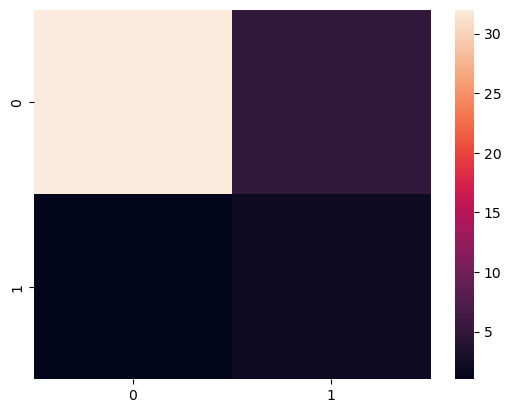

In [81]:
qrf = QRF(X_train,y_train, no_QDT=3, sensetivity=0.5)

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [82]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

5
 Training QDT no : 1
Epoch:  1 | Loss: 0.196609 |  accuracy: 0.728125 
Epoch:  2 | Loss: 0.190496 |  accuracy: 0.728125 
Epoch:  3 | Loss: 0.175672 |  accuracy: 0.768750 
Epoch:  4 | Loss: 0.178171 |  accuracy: 0.784375 
Epoch:  5 | Loss: 0.184046 |  accuracy: 0.750000 
Epoch:  6 | Loss: 0.172952 |  accuracy: 0.746875 
Epoch:  7 | Loss: 0.172762 |  accuracy: 0.756250 
Epoch:  8 | Loss: 0.160370 |  accuracy: 0.753125 
Epoch:  9 | Loss: 0.162369 |  accuracy: 0.771875 
Epoch: 10 | Loss: 0.159957 |  accuracy: 0.762500 
 Training QDT no : 2
Epoch:  1 | Loss: 0.211964 |  accuracy: 0.690625 
Epoch:  2 | Loss: 0.212838 |  accuracy: 0.681250 
Epoch:  3 | Loss: 0.215673 |  accuracy: 0.721875 
Epoch:  4 | Loss: 0.200100 |  accuracy: 0.728125 
Epoch:  5 | Loss: 0.196982 |  accuracy: 0.715625 
Epoch:  6 | Loss: 0.185199 |  accuracy: 0.728125 
Epoch:  7 | Loss: 0.182464 |  accuracy: 0.743750 
Epoch:  8 | Loss: 0.190897 |  accuracy: 0.731250 
Epoch:  9 | Loss: 0.185880 |  accuracy: 0.731250 
Epoch:

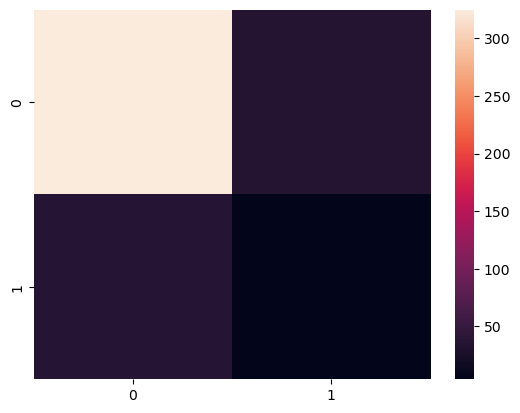

In [107]:
qrf = QRF(X_train,y_train, no_QDT=5, sensetivity= 0.5 ) 

qrf.train()
y_pred,individual_y = qrf.predict(X_test, y_test)
conMtx = confusion_matrix(y_test,y_pred)

sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [105]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [108]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

10
 Training QDT no : 1
Epoch:  1 | Loss: 0.161106 |  accuracy: 0.768750 
Epoch:  2 | Loss: 0.157145 |  accuracy: 0.812500 
Epoch:  3 | Loss: 0.155701 |  accuracy: 0.768750 
Epoch:  4 | Loss: 0.144428 |  accuracy: 0.781250 
Epoch:  5 | Loss: 0.142297 |  accuracy: 0.775000 
Epoch:  6 | Loss: 0.138773 |  accuracy: 0.800000 
Epoch:  7 | Loss: 0.138797 |  accuracy: 0.787500 
Epoch:  8 | Loss: 0.137748 |  accuracy: 0.800000 
Epoch:  9 | Loss: 0.136229 |  accuracy: 0.800000 
Epoch: 10 | Loss: 0.136996 |  accuracy: 0.812500 
 Training QDT no : 2
Epoch:  1 | Loss: 0.218621 |  accuracy: 0.712500 
Epoch:  2 | Loss: 0.230419 |  accuracy: 0.668750 
Epoch:  3 | Loss: 0.172467 |  accuracy: 0.731250 
Epoch:  4 | Loss: 0.184101 |  accuracy: 0.750000 
Epoch:  5 | Loss: 0.171609 |  accuracy: 0.718750 
Epoch:  6 | Loss: 0.170272 |  accuracy: 0.787500 
Epoch:  7 | Loss: 0.171752 |  accuracy: 0.781250 
Epoch:  8 | Loss: 0.168676 |  accuracy: 0.768750 
Epoch:  9 | Loss: 0.167181 |  accuracy: 0.781250 
Epoch

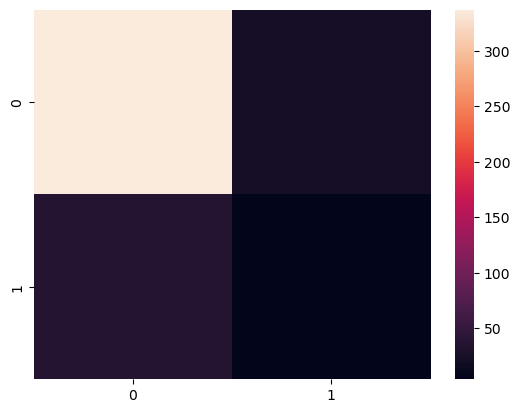

In [113]:
qrf = QRF(X_train,y_train, no_QDT=10, sensetivity=0.6 ) 

qrf.train()

y_pred,individual_y = qrf.predict(X_test, y_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")



In [114]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

20
 Training QDT no : 1
Epoch:  1 | Loss: 0.313233 |  accuracy: 0.512500 
Epoch:  2 | Loss: 0.215813 |  accuracy: 0.675000 
Epoch:  3 | Loss: 0.251511 |  accuracy: 0.625000 
Epoch:  4 | Loss: 0.221169 |  accuracy: 0.662500 
Epoch:  5 | Loss: 0.208016 |  accuracy: 0.700000 
Epoch:  6 | Loss: 0.161384 |  accuracy: 0.762500 
Epoch:  7 | Loss: 0.142137 |  accuracy: 0.787500 
Epoch:  8 | Loss: 0.154314 |  accuracy: 0.812500 
Epoch:  9 | Loss: 0.136818 |  accuracy: 0.787500 
Epoch: 10 | Loss: 0.116023 |  accuracy: 0.812500 
 Training QDT no : 2
Epoch:  1 | Loss: 0.226614 |  accuracy: 0.700000 
Epoch:  2 | Loss: 0.214624 |  accuracy: 0.675000 
Epoch:  3 | Loss: 0.154288 |  accuracy: 0.762500 
Epoch:  4 | Loss: 0.140225 |  accuracy: 0.825000 
Epoch:  5 | Loss: 0.154198 |  accuracy: 0.787500 
Epoch:  6 | Loss: 0.145431 |  accuracy: 0.825000 
Epoch:  7 | Loss: 0.139336 |  accuracy: 0.837500 
Epoch:  8 | Loss: 0.129544 |  accuracy: 0.812500 
Epoch:  9 | Loss: 0.130863 |  accuracy: 0.825000 
Epoch

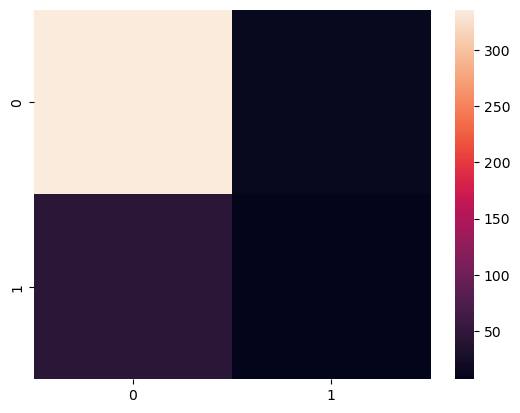

In [19]:
qrf = QRF(X_train,y_train, no_QDT=20,depth=5, sensetivity=0.5 ) 

qrf.train()

y_pred,individual_y = qrf.predict(X_test, y_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")


In [20]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

100
 Training QDT no : 1
Epoch:  1 | Loss: 0.288338 |  accuracy: 0.575000 
Epoch:  2 | Loss: 0.275496 |  accuracy: 0.600000 
Epoch:  3 | Loss: 0.238423 |  accuracy: 0.687500 
Epoch:  4 | Loss: 0.208519 |  accuracy: 0.700000 
Epoch:  5 | Loss: 0.206721 |  accuracy: 0.725000 
Epoch:  6 | Loss: 0.150659 |  accuracy: 0.787500 
Epoch:  7 | Loss: 0.114874 |  accuracy: 0.875000 
Epoch:  8 | Loss: 0.145529 |  accuracy: 0.787500 
Epoch:  9 | Loss: 0.134356 |  accuracy: 0.862500 
Epoch: 10 | Loss: 0.115835 |  accuracy: 0.837500 
 Training QDT no : 2
Epoch:  1 | Loss: 0.256850 |  accuracy: 0.637500 
Epoch:  2 | Loss: 0.185636 |  accuracy: 0.737500 
Epoch:  3 | Loss: 0.181228 |  accuracy: 0.750000 
Epoch:  4 | Loss: 0.114278 |  accuracy: 0.862500 
Epoch:  5 | Loss: 0.095176 |  accuracy: 0.887500 
Epoch:  6 | Loss: 0.126417 |  accuracy: 0.825000 
Epoch:  7 | Loss: 0.116609 |  accuracy: 0.837500 
Epoch:  8 | Loss: 0.112716 |  accuracy: 0.800000 
Epoch:  9 | Loss: 0.103562 |  accuracy: 0.862500 
Epoc

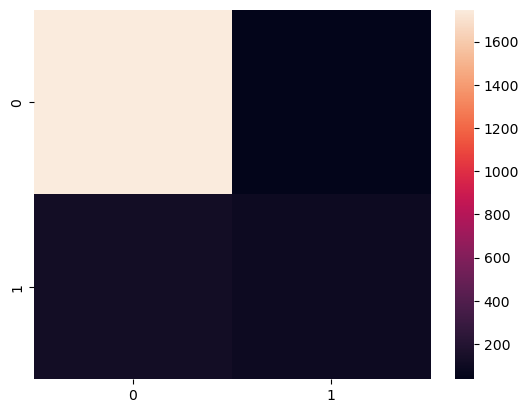

In [32]:
qrf = QRF(X_train,y_train, no_QDT=100,depth=5, sensetivity=0.5 ) 

qrf.train()

y_pred,individual_y = qrf.predict(X_test, y_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [33]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

Recall(TP/FN+TP ):0.641860465116279
Precsion(TP/FP+TP): 0.971830985915493 
F1 score function of presscion and recall:0.7731092436974789 


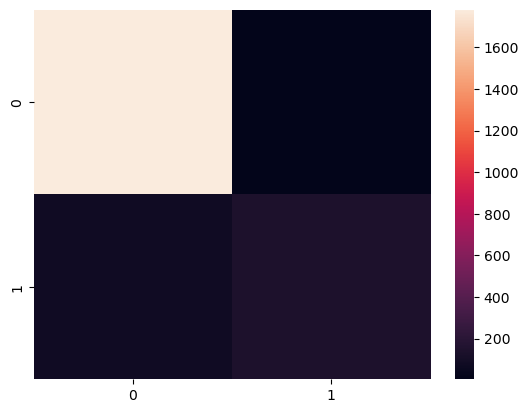

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=2)
model.fit(x_train,y_train)


y_pred = model.predict(X_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")


In [ ]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_test)

In [119]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)

Recall(TP/FN+TP ):0.813953488372093
Precsion(TP/FP+TP): 0.9259259259259259 
F1 score function of presscion and recall:0.8663366336633663 


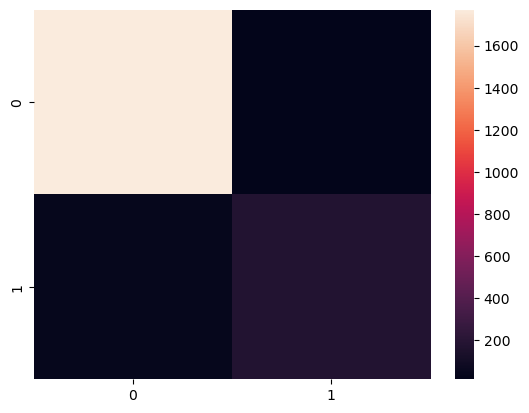

In [35]:
svm = SVC(kernel = 'rbf').fit(x_train, y_train)   

y_pred = svm.predict(X_test)

conMtx = confusion_matrix(y_test,y_pred)
sns.heatmap(conMtx)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)

print(f"Recall(TP/FN+TP ):{recall}")
print(f"Precsion(TP/FP+TP): {pre} ")
print(f"F1 score function of presscion and recall:{f1} ")

In [121]:
px.scatter_3d(x=x_testdf.iloc[:,0],y=x_testdf.iloc[:,1],z=x_testdf.iloc[:,2], color= y_pred)